# DEPENDENCIES
_This module, will import all the dependencies for the project_

In [24]:
#Importing Dependencies
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.tools
import numpy as np
import matplotlib.pyplot as plt

plotly.tools.set_credentials_file(username='xaskoiking', api_key='F8zXiUHFv1R4K9sdIbZl')

# LOADING THE DATA

_This Module, performs the following actions_

- Load the "GA_DISTRICT_SCHOOLS_EXPENDITURE_2010-2017.xlsx" file, which contains the **GA** School **expenditure** for all _counties_ from _2010 to 2017_

- Load the "GA_DISTRICT_SCHOOLS_REVENUE_2010-2017.xlsx" file, which contains the **GA** School **expenditure** for all _counties_ from _2010 to 2017_

- Load the "SAT.csv" file, which contains the **SAT Scores** of all the counties between _2011 and 2016_

In [25]:
!pip install xlrd

mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.


**<font color='blue'>Cleaning the County Expenditure Data</font>** 

In [26]:
#Loading the Counties Expenditure

countiesExpenditureDF = pd.read_excel("GA_DISTRICT_SCHOOLS_EXPENDITURE_2010-2017.xlsx")
countiesExpenditureDF.head()

,Year,Sys No,System Name,FTE Reported on2010 QBE Allotment,Instruction,Per FTE Instruction,Pupil Services,Per FTE Pupil Services,Staff Services,Per FTE Staff Services,General Administration,Per FTE General Administration,School Administration,Per FTE School Administration,Transportation,Per FTE Transportation,Maintenance & Operations,Per FTE Maintenance & Operations,Total Expenditure,Per FTE Total Expenditure
0,2010,601,Appling County,3339,20320498.75,6085.80,1074685.44,321.86,1690704.60,506.35,1352295.76,405.00,1703708.14,510.25,1425057.03,426.79,2327922.67,697.19,29894872.39,8953.24
1,2010,602,Atkinson County,1614,9180528.37,5688.06,404243.65,250.46,1106891.06,685.81,754214.77,467.30,727573.06,450.79,663268.62,410.95,959626.59,594.56,13796346.12,8547.92
2,2010,603,Bacon County,1797,9846623.12,5479.48,603037.61,335.58,739382.48,411.45,584481.98,325.25,997056.79,554.85,627800.02,349.36,1117532.49,621.89,14515914.49,8077.86
3,2010,* 604,Baker County,357,3191302.87,8939.22,57079.44,159.89,191866.95,537.44,479678.32,1343.64,444007.66,1243.72,313806.19,879.01,504137.66,1412.15,5181879.09,14515.07
4,2010,605,Baldwin County,5441,31934393.83,5869.21,1340266.71,246.33,2452419.16,450.73,2147748.27,394.73,2771029.44,509.29,2554583.23,469.51,3284108.22,603.59,46484548.86,8543.38


In [27]:
#Selecting the required columns
countiesExpenditureDF = countiesExpenditureDF.iloc[:, [0,1,2,18,19]]
countiesExpenditureDF.head()

,Year,Sys No,System Name,Total Expenditure,Per FTE Total Expenditure
0,2010,601,Appling County,29894872.39,8953.24
1,2010,602,Atkinson County,13796346.12,8547.92
2,2010,603,Bacon County,14515914.49,8077.86
3,2010,* 604,Baker County,5181879.09,14515.07
4,2010,605,Baldwin County,46484548.86,8543.38


In [28]:
#Changing the Column Name
countiesExpenditureDF = countiesExpenditureDF.rename(columns={"System Name":"County Name", "Sys No": "County ID"})
countiesExpenditureDF.head()

,Year,County ID,County Name,Total Expenditure,Per FTE Total Expenditure
0,2010,601,Appling County,29894872.39,8953.24
1,2010,602,Atkinson County,13796346.12,8547.92
2,2010,603,Bacon County,14515914.49,8077.86
3,2010,* 604,Baker County,5181879.09,14515.07
4,2010,605,Baldwin County,46484548.86,8543.38


**<font color='blue'>Cleaning the County Revenue Data</font>** 

In [29]:
#Loading the Counties Revenue

countiesRevenueDF = pd.read_excel("GA_DISTRICT_SCHOOLS_REVENUE_2010-2017.xlsx")
countiesRevenueDF.head()

,Year,Sys No.,System Name,FTE Reported on 2010 QBE Allotment,Local Revenues,Per FTE Local,% Local,State Revenues,Per FTE State,% State,Federal Revenues,Per FTE Federal,% Federal,Total Revenues,Per FTE Total
0,2010,601,Appling County,3339,9373097.06,2807.16,31.54,15364821.39,4601.62,51.71,4977291.23,1490.65,16.75,29715209.68,8899.43
1,2010,602,Atkinson County,1614,2205329.69,1366.38,15.74,8894832.59,5511.05,63.49,2908674.98,1802.15,20.76,14008837.26,8679.58
2,2010,603,Bacon County,1797,2966262.16,1650.67,19.18,9732951.03,5416.22,62.92,2769411.26,1541.13,17.90,15468624.45,8608.03
3,2010,* 604,Baker County,357,1632160.11,4571.88,33.82,1982454.97,5553.10,41.08,1211385.93,3393.24,25.10,4826001.01,13518.21
4,2010,605,Baldwin County,5441,17749204.50,3262.12,37.71,21807604.85,4008.01,46.33,7515276.39,1381.23,15.97,47072085.74,8651.37


In [30]:
#Selecting the required columns
countiesRevenueDF = countiesRevenueDF.iloc[:, [0,1,2,13,14]]
countiesRevenueDF.head()

,Year,Sys No.,System Name,Total Revenues,Per FTE Total
0,2010,601,Appling County,29715209.68,8899.43
1,2010,602,Atkinson County,14008837.26,8679.58
2,2010,603,Bacon County,15468624.45,8608.03
3,2010,* 604,Baker County,4826001.01,13518.21
4,2010,605,Baldwin County,47072085.74,8651.37


In [31]:
#Changing the Column Name
countiesRevenueDF = countiesRevenueDF.rename(columns={"System Name":"County Name", "Sys No.": "County ID"})
countiesRevenueDF.head()

,Year,County ID,County Name,Total Revenues,Per FTE Total
0,2010,601,Appling County,29715209.68,8899.43
1,2010,602,Atkinson County,14008837.26,8679.58
2,2010,603,Bacon County,15468624.45,8608.03
3,2010,* 604,Baker County,4826001.01,13518.21
4,2010,605,Baldwin County,47072085.74,8651.37


**<font color='blue'>Merging the two dataframes for Revenue & Expenditure</font>** 

In [32]:
#Joining two Dataframe
revenueExpenditureDF = countiesRevenueDF.merge(countiesExpenditureDF, how="inner", on= ["Year", "County ID", "County Name"])

#Trimming White Spaces, since it is a column to join with SAT Score
revenueExpenditureDF["County Name"] = revenueExpenditureDF["County Name"].str.strip()

revenueExpenditureDF.head()

,Year,County ID,County Name,Total Revenues,Per FTE Total,Total Expenditure,Per FTE Total Expenditure
0,2010,601,Appling County,29715209.68,8899.43,29894872.39,8953.24
1,2010,602,Atkinson County,14008837.26,8679.58,13796346.12,8547.92
2,2010,603,Bacon County,15468624.45,8608.03,14515914.49,8077.86
3,2010,* 604,Baker County,4826001.01,13518.21,5181879.09,14515.07
4,2010,605,Baldwin County,47072085.74,8651.37,46484548.86,8543.38


**<font color='blue'>Cleaning the SAT Score Data</font>** 

In [33]:
csv_path = "SAT.csv"
satScoreDF = pd.read_csv(csv_path)
satScoreDF.head()

,LONG_SCHOOL_YEAR,SCHOOL_DISTRCT_CD,SCHOOL_DSTRCT_NM,INSTN_NUMBER,INSTN_NAME,SUBGRP_DESC,TEST_CMPNT_TYP_CD,NATIONAL_NUM_TESTED_CNT,STATE_NUM_TESTED_CNT,DSTRCT_NUM_TESTED_CNT,INSTN_NUM_TESTED_CNT,STATE_AVG_SCORE_VAL,DSTRCT_AVG_SCORE_VAL,INSTN_AVG_SCORE_VAL
0,2010-11,601,Appling County,103,Appling County High School,All Students,Combined,1267239,84678,85,85,1451,1367.0,1367.0
1,2010-11,601,Appling County,103,Appling County High School,All Students,Mathematics,1267239,84799,86,86,490,457.0,457.0
2,2010-11,601,Appling County,103,Appling County High School,All Students,Reading,1267239,84686,85,85,486,464.0,464.0
3,2010-11,601,Appling County,103,Appling County High School,All Students,Writing,1267239,84548,85,85,474,446.0,446.0
4,2010-11,602,Atkinson County,103,Atkinson County High School,All Students,Combined,1267239,84678,35,35,1451,1321.0,1321.0


In [34]:
#Dropping the unnecessary columns

satScoreDF = satScoreDF.drop(['SUBGRP_DESC',
                      'INSTN_NUMBER', 'INSTN_AVG_SCORE_VAL', 
                      'INSTN_NUM_TESTED_CNT','INSTN_NAME'], axis=1 )

satScoreDF.head()

,LONG_SCHOOL_YEAR,SCHOOL_DISTRCT_CD,SCHOOL_DSTRCT_NM,TEST_CMPNT_TYP_CD,NATIONAL_NUM_TESTED_CNT,STATE_NUM_TESTED_CNT,DSTRCT_NUM_TESTED_CNT,STATE_AVG_SCORE_VAL,DSTRCT_AVG_SCORE_VAL
0,2010-11,601,Appling County,Combined,1267239,84678,85,1451,1367.0
1,2010-11,601,Appling County,Mathematics,1267239,84799,86,490,457.0
2,2010-11,601,Appling County,Reading,1267239,84686,85,486,464.0
3,2010-11,601,Appling County,Writing,1267239,84548,85,474,446.0
4,2010-11,602,Atkinson County,Combined,1267239,84678,35,1451,1321.0


In [35]:
#Renaming the Columns

satScoreDF = satScoreDF.rename(columns={"LONG_SCHOOL_YEAR":"Year", "SCHOOL_DSTRCT_NM": "County Name", "TEST_CMPNT_TYP_CD":
                                "Category of SAT Scores","NATIONAL_NUM_TESTED_CNT": "Nat Num Stdnt Tested", "STATE_NUM_TESTED_CNT": 
                                "St Num Stdnt Tested", "DSTRCT_NUM_TESTED_CNT": "Dist Num Stdnt Tested",
                               "STATE_AVG_SCORE_VAL": "St Avg SAT Score", "DSTRCT_AVG_SCORE_VAL": "Dist Avg SAT Score",
                            "SCHOOL_DISTRCT_CD": "County ID"})

#Filtering only for the Combined and Combined Test Score
Combined_SAT_df1 = satScoreDF[ satScoreDF["Category of SAT Scores"] == "Combined" ] 
Combined_SAT_df2 = satScoreDF[ satScoreDF["Category of SAT Scores"] == "Combined Test Score" ] 

#Appending the two temp data frame
Combined_SAT_df = Combined_SAT_df1.append(Combined_SAT_df2)

#Resetting Index
Combined_SAT_df = Combined_SAT_df.reset_index(drop=True)
Combined_SAT_df.head()

,Year,County ID,County Name,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score
0,2010-11,601,Appling County,Combined,1267239,84678,85,1451,1367.0
1,2010-11,602,Atkinson County,Combined,1267239,84678,35,1451,1321.0
2,2010-11,603,Bacon County,Combined,1267239,84678,57,1451,1369.0
3,2010-11,604,Baker County,Combined,1267239,84678,11,1451,1059.0
4,2010-11,605,Baldwin County,Combined,1267239,84678,198,1451,1298.0


In [36]:
#Cleaning the Column Name

#Combined_SAT_df["Year"] = Combined_SAT_df["Year"].str.split('-').str[0]
Combined_SAT_df["Year"] = '20' + Combined_SAT_df["Year"].str.split('-').str[1]

#Updating the Dataframe Columns for merging
Combined_SAT_df["Year"] = Combined_SAT_df["Year"].apply(int)

#Trimming White Spaces, since it is a column to join with Revenue/Expenditure Score
Combined_SAT_df["County Name"] = Combined_SAT_df["County Name"].str.strip()

Combined_SAT_df.head()

,Year,County ID,County Name,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score
0,2011,601,Appling County,Combined,1267239,84678,85,1451,1367.0
1,2011,602,Atkinson County,Combined,1267239,84678,35,1451,1321.0
2,2011,603,Bacon County,Combined,1267239,84678,57,1451,1369.0
3,2011,604,Baker County,Combined,1267239,84678,11,1451,1059.0
4,2011,605,Baldwin County,Combined,1267239,84678,198,1451,1298.0


**<font color='blue'>Combining Revenue/Expenditure & SAT Data Score</font>** 

In [37]:
revExpSatCombinedDF= revenueExpenditureDF.merge(Combined_SAT_df, how="inner", on= ["Year", "County Name"])

In [38]:
revExpSatCombinedDF.head()

,Year,County ID_x,County Name,Total Revenues,Per FTE Total,Total Expenditure,Per FTE Total Expenditure,County ID_y,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score
0,2011,601,Appling County,32474144.93,9656.30,28848323.76,8578.15,601,Combined,1267239,84678,85,1451,1367.0
1,2011,602,Atkinson County,14620599.14,8834.20,13981986.72,8448.33,602,Combined,1267239,84678,35,1451,1321.0
2,2011,603,Bacon County,16256643.40,8511.33,15264909.48,7992.10,603,Combined,1267239,84678,57,1451,1369.0
3,2011,* 604,Baker County,4804585.66,14471.64,3545551.13,10679.37,604,Combined,1267239,84678,11,1451,1059.0
4,2011,605,Baldwin County,49310001.42,9044.39,45258063.10,8301.19,605,Combined,1267239,84678,198,1451,1298.0


**<font color='blue'>Clearning the Final Combined Data</font>** 

In [79]:
#Renaming the County ID Column
revExpSatCombinedDF = revExpSatCombinedDF.rename(columns={"County ID_y":"County ID"})
revExpSatCombinedDF['BOBO'] = revExpSatCombinedDF['Per FTE Total Expenditure'] / revExpSatCombinedDF['Dist Num Stdnt Tested']
#Export to CSV
revExpSatCombinedDF.to_csv("cleaned_data.csv")

In [62]:
revExpSatCombinedDF.head()

,Year,County ID_x,County Name,Total Revenues,Per FTE Total,Total Expenditure,Per FTE Total Expenditure,County ID,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score,Expenditure Per Student
0,2011,601,Appling County,32474144.93,9656.30,28848323.76,8578.15,601,Combined,1267239,84678,85,1451,1367.0,339392.044235
1,2011,602,Atkinson County,14620599.14,8834.20,13981986.72,8448.33,602,Combined,1267239,84678,35,1451,1321.0,399485.334857
2,2011,603,Bacon County,16256643.40,8511.33,15264909.48,7992.10,603,Combined,1267239,84678,57,1451,1369.0,267805.429474
3,2011,* 604,Baker County,4804585.66,14471.64,3545551.13,10679.37,604,Combined,1267239,84678,11,1451,1059.0,322322.830000
4,2011,605,Baldwin County,49310001.42,9044.39,45258063.10,8301.19,605,Combined,1267239,84678,198,1451,1298.0,228576.076263


**<font color='black'>MAPPING</font>:** **<font color='blue'>Pulling in the global dataset for bringing in the Georgia County FIPS ID</font>** 

In [42]:
global_data_ga = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
global_data_ga = global_data_ga[global_data_ga['STNAME'] == 'Georgia']
global_data_ga.head()

,FIPS,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
2807,13001,Georgia,Appling County,18368,9294,9074,7197,7139,6284,6520,12804,5564,No,30.29%,3607,20%,1728,9.41%
2808,13003,Georgia,Atkinson County,8284,4203,4081,3291,3143,2317,2371,4688,3596,No,43.41%,1459,18%,2050,24.75%
2809,13005,Georgia,Bacon County,11198,5562,5636,4558,4592,4094,4273,8367,2831,No,25.28%,1790,16%,890,7.95%
2810,13007,Georgia,Baker County,3366,1606,1760,858,876,796,823,1619,1747,Yes,51.90%,1551,46%,152,4.52%
2811,13009,Georgia,Baldwin County,46367,23365,23002,13011,12750,12638,12391,25029,21338,No,46.02%,19150,41%,977,2.11%


In [43]:
global_data_ga  = global_data_ga.iloc[:,0:3]
global_data_ga = global_data_ga.rename(columns={"CTYNAME":"County Name"})
global_data_ga.head()

,FIPS,STNAME,County Name
2807,13001,Georgia,Appling County
2808,13003,Georgia,Atkinson County
2809,13005,Georgia,Bacon County
2810,13007,Georgia,Baker County
2811,13009,Georgia,Baldwin County


In [58]:
#Merging

revExpSatCombinedMappingDF = revExpSatCombinedDF.merge(global_data_ga, how='inner', on='County Name')
revExpSatCombinedMappingDF = revExpSatCombinedMappingDF.dropna()
revExpSatCombinedMappingDF.head()

#Updating the incorrect numbers using the average
revExpSatCombinedMappingDF['Dist Avg SAT Score'] = np.where(revExpSatCombinedMappingDF['Dist Avg SAT Score'] > 1600, np.mean(revExpSatCombinedMappingDF['Dist Avg SAT Score']), revExpSatCombinedMappingDF['Dist Avg SAT Score'])
revExpSatCombinedMappingDF.head()

,Year,County ID_x,County Name,Total Revenues,Per FTE Total,Total Expenditure,Per FTE Total Expenditure,County ID,Category of SAT Scores,Nat Num Stdnt Tested,St Num Stdnt Tested,Dist Num Stdnt Tested,St Avg SAT Score,Dist Avg SAT Score,FIPS,STNAME,Expenditure Per Student
0,2011,601,Appling County,32474144.93,9656.30,28848323.76,8578.15,601,Combined,1267239,84678,85,1451,1367.0,13001,Georgia,339392.044235
1,2012,601,Appling County,29832517.50,8870.81,28567145.14,8494.54,601,Combined,1284459,86835,123,1453,1342.0,13001,Georgia,232253.212520
2,2013,601,Appling County,28836125.91,8528.87,28670923.87,8480.01,601,Combined,1295267,86575,144,1443,1367.0,13001,Georgia,199103.637986
3,2014,601,Appling County,30589954.52,8882.10,30328616.21,8806.22,601,Combined,1306039,83291,110,1459,1388.0,13001,Georgia,275714.692818
4,2015,601,Appling County,31536480.43,8979.64,32091416.00,9137.65,601,Combined,1332096,85316,151,1455,1390.0,13001,Georgia,212525.933775


In [45]:
#Getting the data for yearly Trend
fips2011 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2011]["FIPS"]
fips2012 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2012]["FIPS"]
fips2013 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2013]["FIPS"]
fips2014 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2014]["FIPS"]
fips2015 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2015]["FIPS"]
fips2016 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2016]["FIPS"]

distAvg2011 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2011]["Dist Avg SAT Score"]
distAvg2012 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2012]["Dist Avg SAT Score"]
distAvg2013 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2013]["Dist Avg SAT Score"]
distAvg2014 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2014]["Dist Avg SAT Score"]
distAvg2015 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2015]["Dist Avg SAT Score"]
distAvg2016 = revExpSatCombinedMappingDF[revExpSatCombinedMappingDF["Year"] == 2016]["Dist Avg SAT Score"]


In [46]:
#Color Scale for Mapo
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)',
    'rgb(255, 255, 0)',
    'rgb(255,0,255)'
]

In [47]:
#2011 Mapping
fig2 = ff.create_choropleth(
    fips=fips2011, values=distAvg2011, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='Total Revenue by County', title='District Avg score by County - 2011', 
)
py.iplot(fig2, filename='District Average Score 2011')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [48]:
#2012 Mapping
fig = ff.create_choropleth(
    fips=fips2012, values=distAvg2012, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='Total Revenue by County', title='District Avg score by County - 2012', 
)
py.iplot(fig, filename='District Average Score 2012')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [49]:
#2013 Mapping
fig = ff.create_choropleth(
    fips=fips2013, values=distAvg2013, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='Total Revenue by County', title='District Avg score by County - 2013', 
)
py.iplot(fig, filename='District Average Score 2013')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [50]:
#2014 Mapping
fig = ff.create_choropleth(
    fips=fips2014, values=distAvg2014, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='Total Revenue by County', title='District Avg score by County - 2014', 
)
py.iplot(fig, filename='District Average Score 2014')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [51]:
#2015 Mapping
fig = ff.create_choropleth(
    fips=fips2015, values=distAvg2015, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='Total Revenue by County', title='District Avg score by County - 2015', 
)
py.iplot(fig, filename='District Average Score 2015')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [52]:
#2016 Mapping
fig = ff.create_choropleth(
    fips=fips2016, values=distAvg2016, scope=['GA'],
    binning_endpoints=[1000, 1100, 1200, 1300, 1400,1500,1600], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 2}, round_legend_values=True,
    legend_title='Total Revenue by County', title='District Avg score by County - 2016', 
)
py.iplot(fig, filename='District Average Score 2016')

C:\Users\kraag\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




**<font color='black'>PLOTTING</font>:** **<font color='blue'>SCATTER PLOT</font>** 

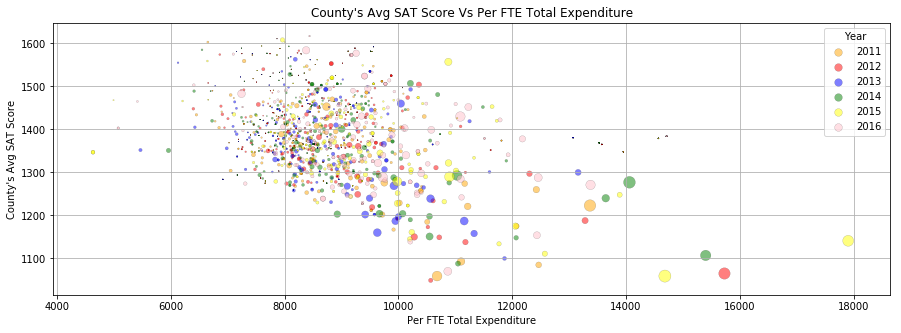

In [80]:
#Creating a scatter plot

fig, ax = plt.subplots(figsize=(15, 5))

#i) First plot for Year = "2011"
ax.scatter(revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]['Per FTE Total Expenditure'], 
           revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]['Dist Avg SAT Score'],  
           c='orange', 
           s=revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]['BOBO'] * 0.1,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2011')

#ii) Plot for Year = "2012"
ax.scatter(revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2012]['Per FTE Total Expenditure'], 
           revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2012]['Dist Avg SAT Score'],  
           c='red', 
           s=revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2012]['BOBO'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2012')

#iii) Plot for Year = "2013"
ax.scatter(revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2013]['Per FTE Total Expenditure'], 
           revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2013]['Dist Avg SAT Score'],  
           c='blue', 
           s=revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2013]['BOBO'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2013')

#iv) Plot for Year = "2014"
ax.scatter(revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2014]['Per FTE Total Expenditure'], 
           revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2014]['Dist Avg SAT Score'],  
           c='green', 
           s=revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2014]['BOBO'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2014')

#v) Plot for Year = "2015"
ax.scatter(revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2015]['Per FTE Total Expenditure'], 
           revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2015]['Dist Avg SAT Score'],  
           c='yellow', 
           s=revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2015]['BOBO'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2015')

#vi) Plot for Year = "2016"
ax.scatter(revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2016]['Per FTE Total Expenditure'], 
           revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2016]['Dist Avg SAT Score'],  
           c='pink', 
           s=revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2016]['BOBO'] * 0.1 ,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2016')
##### Incorporate the other graph properties####
#Setting the Title of the scatter plot
plt.title("County's Avg SAT Score Vs Per FTE Total Expenditure")

#Setting the X and Y axis of scatter plot
plt.xlabel("Per FTE Total Expenditure")
plt.ylabel("County's Avg SAT Score")

#Gridding the scatter plot
plt.grid()

#####  Create a legend  #####
#LEGEND Functions
#1) Setting the Legent title
lgnd = plt.legend(title="Year")

#2) Making the legeng size uniform. 
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]
lgnd.legendHandles[3]._sizes = [60]
lgnd.legendHandles[4]._sizes = [60]
lgnd.legendHandles[5]._sizes = [60]


plt.show()

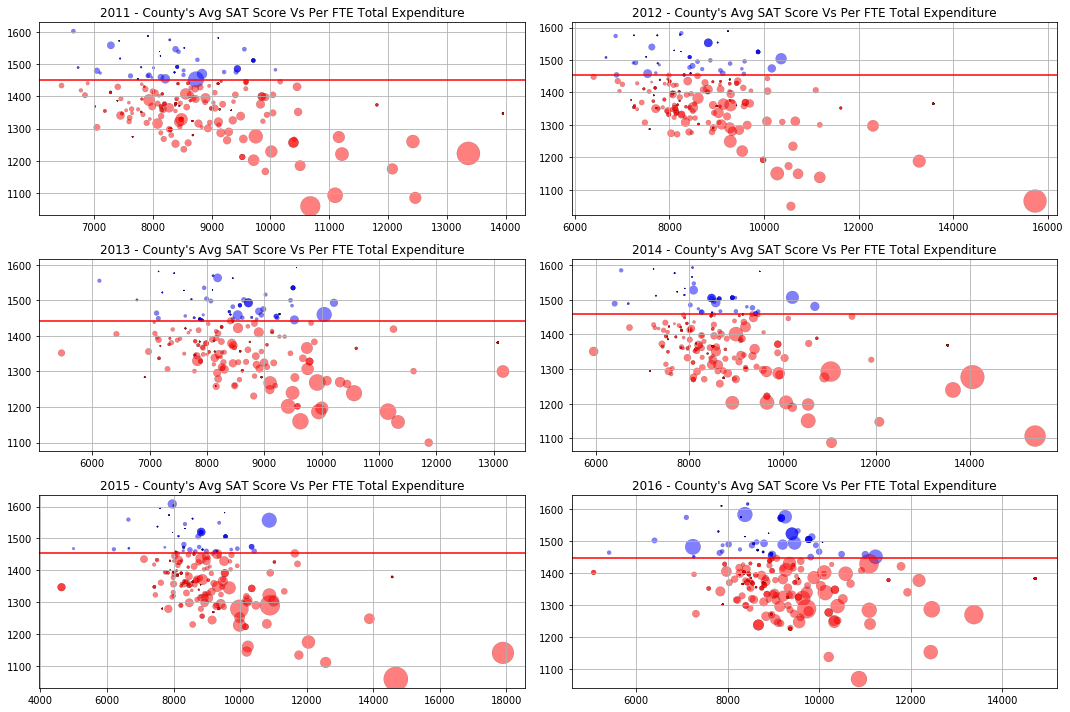

In [179]:
#Creating a scatter plot

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))


#i) First plot for Year = "2011"
plt.subplot(321) 

stateAvg2011 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]['St Avg SAT Score'].tolist()
revExpSatCombinedDF2011 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]
revExpSatCombinedDF2011['color'] = np.where((revExpSatCombinedDF2011['Dist Avg SAT Score'] > stateAvg2011), 'blue', 'red')

plt.scatter(x = revExpSatCombinedDF2011['Per FTE Total Expenditure'], 
           y = revExpSatCombinedDF2011['Dist Avg SAT Score'],  
           c=revExpSatCombinedDF2011['color'], 
           s=revExpSatCombinedDF2011['BOBO'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2011')

plt.axhline(y=min(stateAvg2011), color='r', linestyle='-')
plt.grid()
plt.title("2011 - County's Avg SAT Score Vs Per FTE Total Expenditure")


#ii) First plot for Year = "2012"
plt.subplot(322) 
stateAvg2012 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2012]['St Avg SAT Score'].tolist()
revExpSatCombinedDF2012 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2012]
revExpSatCombinedDF2012['color'] = np.where((revExpSatCombinedDF2012['Dist Avg SAT Score'] > stateAvg2012), 'blue', 'red')

plt.scatter(x = revExpSatCombinedDF2012['Per FTE Total Expenditure'], 
           y = revExpSatCombinedDF2012['Dist Avg SAT Score'],  
           c=revExpSatCombinedDF2012['color'], 
           s=revExpSatCombinedDF2012['BOBO'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2012')

plt.axhline(y=min(stateAvg2012), color='r', linestyle='-')
plt.grid()
plt.title("2012 - County's Avg SAT Score Vs Per FTE Total Expenditure")


#iii) First plot for Year = "2013"
plt.subplot(323) 

stateAvg2013 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2013]['St Avg SAT Score'].tolist()
revExpSatCombinedDF2013 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2013]
revExpSatCombinedDF2013['color'] = np.where((revExpSatCombinedDF2013['Dist Avg SAT Score'] > stateAvg2013), 'blue', 'red')

plt.scatter(x = revExpSatCombinedDF2013['Per FTE Total Expenditure'], 
           y = revExpSatCombinedDF2013['Dist Avg SAT Score'],  
           c=revExpSatCombinedDF2013['color'], 
           s=revExpSatCombinedDF2013['BOBO'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2013')

plt.axhline(y=min(stateAvg2013), color='r', linestyle='-')
plt.grid()
plt.title("2013 - County's Avg SAT Score Vs Per FTE Total Expenditure")


#iv) First plot for Year = "2014"
plt.subplot(324)

stateAvg2014 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2014]['St Avg SAT Score'].tolist()
revExpSatCombinedDF2014 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2014]
revExpSatCombinedDF2014['color'] = np.where((revExpSatCombinedDF2014['Dist Avg SAT Score'] > stateAvg2014), 'blue', 'red')

plt.scatter(x = revExpSatCombinedDF2014['Per FTE Total Expenditure'], 
           y = revExpSatCombinedDF2014['Dist Avg SAT Score'],  
           c=revExpSatCombinedDF2014['color'], 
           s=revExpSatCombinedDF2014['BOBO'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2014')

plt.axhline(y=min(stateAvg2014), color='r', linestyle='-')
plt.grid()
plt.title("2014 - County's Avg SAT Score Vs Per FTE Total Expenditure")


#v) First plot for Year = "2015"
plt.subplot(325) 

stateAvg2015 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2015]['St Avg SAT Score'].tolist()
revExpSatCombinedDF2015 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2015]
revExpSatCombinedDF2015['color'] = np.where((revExpSatCombinedDF2015['Dist Avg SAT Score'] > stateAvg2015), 'blue', 'red')

plt.scatter(x = revExpSatCombinedDF2015['Per FTE Total Expenditure'], 
           y = revExpSatCombinedDF2015['Dist Avg SAT Score'],  
           c=revExpSatCombinedDF2015['color'], 
           s=revExpSatCombinedDF2015['BOBO'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2015')

plt.axhline(y=min(stateAvg2015), color='r', linestyle='-')
plt.grid()
plt.title("2015 - County's Avg SAT Score Vs Per FTE Total Expenditure")



#vi) First plot for Year = "2016"
plt.subplot(326) 
stateAvg2016 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2016]['St Avg SAT Score'].tolist()
revExpSatCombinedDF2016 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2016]
revExpSatCombinedDF2016['color'] = np.where((revExpSatCombinedDF2016['Dist Avg SAT Score'] > stateAvg2016), 'blue', 'red')

plt.scatter(x = revExpSatCombinedDF2016['Per FTE Total Expenditure'], 
           y = revExpSatCombinedDF2016['Dist Avg SAT Score'],  
           c=revExpSatCombinedDF2016['color'], 
           s=revExpSatCombinedDF2016['BOBO'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2016')

plt.axhline(y=min(stateAvg2016), color='r', linestyle='-')
plt.grid()
plt.title("2016 - County's Avg SAT Score Vs Per FTE Total Expenditure")


##### Incorporate the other graph properties####
#Setting the Title of the scatter plot
#plt.title("County's Avg SAT Score Vs Per FTE Total Expenditure")

#Setting the X and Y axis of scatter plot
#plt.xlabel("Per FTE Total Expenditure")
#plt.ylabel("County's Avg SAT Score")

#Gridding the scatter plot
#plt.grid()

plt.tight_layout()
plt.show()

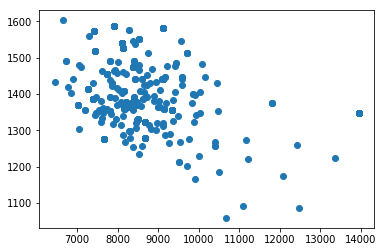

In [99]:
plt.scatter(x=revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]['Per FTE Total Expenditure'], y=revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]['Dist Avg SAT Score'])

In [133]:
a = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]['St Avg SAT Score'].tolist()

In [135]:
min(a)


1451

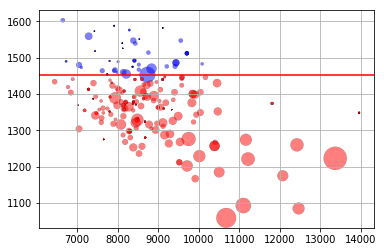

In [149]:
stateAvg2011 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]['St Avg SAT Score'].tolist()

revExpSatCombinedDF2011 = revExpSatCombinedDF[revExpSatCombinedDF['Year'] == 2011]

revExpSatCombinedDF2011['color'] = np.where((revExpSatCombinedDF2011['Dist Avg SAT Score'] > stateAvg2011), 'blue', 'red')

plt.scatter(x = revExpSatCombinedDF2011['Per FTE Total Expenditure'], 
           y = revExpSatCombinedDF2011['Dist Avg SAT Score'],  
           c=revExpSatCombinedDF2011['color'], 
           s=revExpSatCombinedDF2011['BOBO'] * 0.4,
           alpha=0.5, 
           linewidths = 0.2,
           edgecolor='black', 
           label='2011')

plt.axhline(y=min(stateAvg2011), color='r', linestyle='-')
plt.grid()